# Python packages

In [2]:
import torch
import numpy as np
import seaborn as sns
from torchvision import datasets

In [3]:
import os
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [5]:
import random
from PIL import Image
import glob
from pathlib import Path

# Pytorch Tutorial

In [5]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)


In [6]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [7]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.9383, 0.3004],
        [0.1638, 0.1538]]) 



In [8]:
# Attributes of a Tensor
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [9]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [10]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [11]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [12]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x280db3730>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x107530190>


In [13]:
ToTensor() # converts a PIL image into a FloatTensor
nn.Sequential() # ordered container of modules 

Sequential()

In [14]:
torch.__version__

'2.3.1'

# Kaggle (classifying cats and dogs)

# Functions

In [73]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [76]:
def plot_transformed_images(image_paths, transform, n=3, seed = 42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1,2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Class: {Path(random_image_path).parent.stem}", fontsize=16)




# Loading the data

In [77]:
image_path = "/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/"
walk_through_dir(image_path)

There are 2 directories and 1 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/'.
There are 2 directories and 0 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set'.
There are 0 directories and 4006 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set/dogs'.
There are 0 directories and 4001 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set/cats'.
There are 2 directories and 1 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set'.
There are 0 directories and 1013 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set/dogs'.
There are 0 directories and 1012 images in '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set/cats'.


In [80]:
train_dir = "/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set"
test_dir = "/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set"
train_dir, test_dir

('/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set',
 '/Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set')

random image path: /Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set/dogs/dog.3491.jpg
image height: 500
image width: 369
image class: <class 'PIL.JpegImagePlugin.JpegImageFile'>


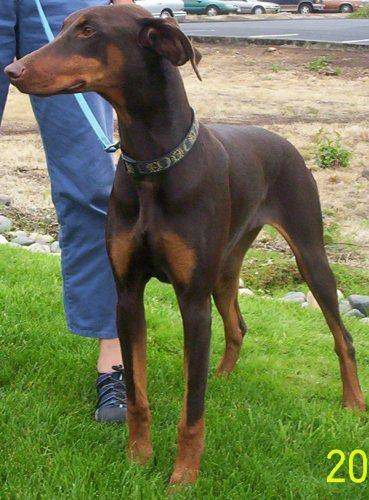

In [82]:
random.seed(42)
pattern = os.path.join(image_path, '*', '*', '*.jpg')

# Get the list of image paths
image_path_list = glob.glob(pattern)

random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = Path(random_image_path).parent.stem

# 4. Open image
img = Image.open(random_image_path)

print(f"random image path: {random_image_path}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
print(f"image class: {img.__class__}")
img

[[[ 63  87 131]
  [ 58  83 124]
  [ 54  79 119]
  ...
  [225 224 232]
  [235 234 242]
  [220 226 238]]

 [[ 70  94 138]
  [ 64  89 130]
  [ 58  83 123]
  ...
  [191 190 196]
  [209 206 213]
  [197 202 208]]

 [[ 74  97 141]
  [ 68  91 133]
  [ 61  84 125]
  ...
  [163 161 162]
  [151 149 150]
  [172 179 172]]

 ...

 [[135 173  88]
  [ 81 121  33]
  [ 62 106  17]
  ...
  [ 52  97  12]
  [ 53 102  13]
  [ 54 107  15]]

 [[119 157  72]
  [ 65 105  17]
  [ 45  89   0]
  ...
  [ 58 103  18]
  [ 54 103  14]
  [ 58 111  19]]

 [[ 73 111  26]
  [ 43  83   0]
  [ 49  93   4]
  ...
  [ 62 107  22]
  [ 48  97   8]
  [ 69 122  30]]]


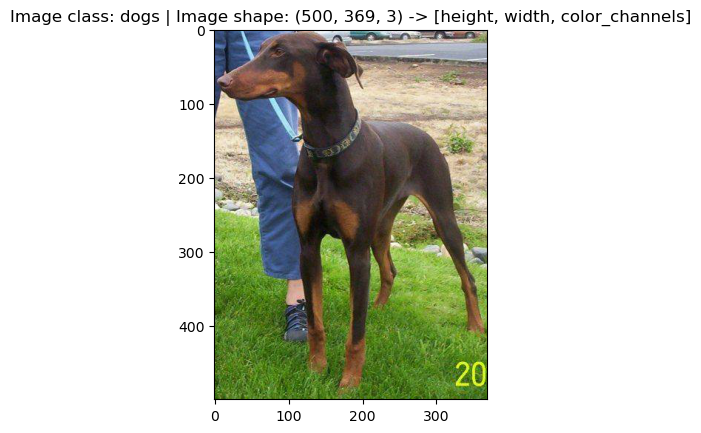

In [83]:
sns.set_theme
img_as_array = np.asarray(img)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.imshow(img_as_array)
print(img_as_array)

# transforming the images

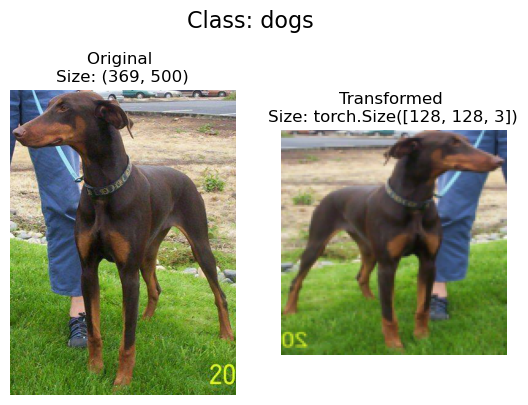

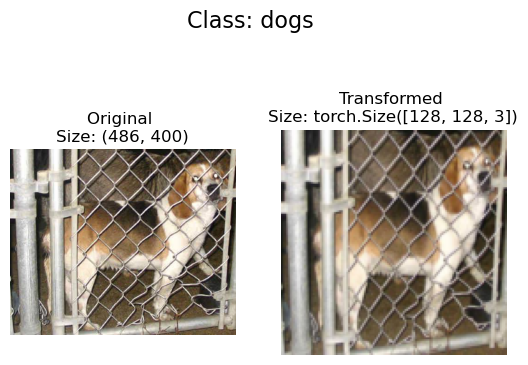

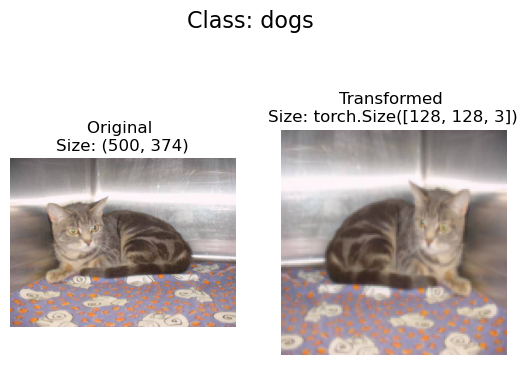

In [79]:
plot_transformed_images(image_path_list, transform=data_transform, n=3)

In [84]:
new_height = 128
new_width = 128
new_size = (new_height, new_width)

data_transform = transforms.Compose([transforms.Resize(size= new_size),transforms.RandomHorizontalFlip(p=0.5), transforms.ToTensor()])



In [85]:
# Creating training set
train_data = datasets.ImageFolder(root=train_dir, 
                                  transform=data_transform, 
                                  target_transform=None) 
#Creating test set
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 8005
    Root location: /Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/training_set
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 2023
    Root location: /Users/annikaseo-yeonkim/Desktop/MongooseAI/Week_5/kaggle-5/test_set
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


# Using torch and cuda (setting up pytorch and cuda)

In [86]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
    # output expected:
    # tensor([1.], device='mps:0')

else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [87]:
# GPU
import time
start_time = time.time()

# syncrocnize time with cpu, otherwise only time for oflaoding data to gpu would be measured
torch.mps.synchronize()

a = torch.ones(4000,4000, device="mps")
for _ in range(200):
   a +=a

elapsed_time = time.time() - start_time
print( "GPU Time: ", elapsed_time)

GPU Time:  0.539682149887085


In [88]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


# Model testing and training

In [89]:
import tensorflow as tf

cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data()
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 3),
    classes=100,)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
177/782 ━━━━━━━━━━━━━━━━━━━━ 13:04 1s/step - accuracy: 0.0290 - loss: 5.7131

KeyboardInterrupt: 

In [62]:
class ImageClassifier(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
          nn.Conv2d(3, 64, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(64),
          nn.MaxPool2d(2))
        self.conv_layer_2 = nn.Sequential(
          nn.Conv2d(64, 512, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2))
        self.conv_layer_3 = nn.Sequential(
          nn.Conv2d(512, 512, kernel_size=3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(512),
          nn.MaxPool2d(2)) 
        self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=512*3*3, out_features=2))

    def forward(self, x: torch.Tensor):
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_3(x)
        x = self.classifier(x)
        return x
# Instantiate an object.
model = ImageClassifier().to(device)

In [63]:
train_transform = transforms.Compose([transforms.Resize(new_size), transforms.TrivialAugmentWide(),transforms.ToTensor()])
test_transform = transforms.Compose([transforms.Resize(new_size), transforms.TrivialAugmentWide(), transforms.ToTensor()])

In [64]:
train_data_augmented = datasets.ImageFolder(train_dir, transform = train_transform)
test_data_augmented = datasets.ImageFolder(test_dir, transform = test_transform)


In [65]:
BATCH_SIZE = 32
NUM_WORKERS = 42
train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_augmented = DataLoader(test_data_augmented, 
                                       batch_size=BATCH_SIZE, 
                                       shuffle=False, 
                                       num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_augmented

/Users/annikaseo-yeonkim/anaconda3/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 42 worker processes in total. Our suggested max number of worker in current system is 8 (`cpuset` is not taken into account), which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


(<torch.utils.data.dataloader.DataLoader at 0x3157dab50>,
 <torch.utils.data.dataloader.DataLoader at 0x3157dad10>)

In [66]:
img_batch, label_batch = next(iter(train_dataloader_augmented))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model.eval()
with torch.inference_mode():
    pred = model(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/Users/annikaseo-yeonkim/anaconda3/lib/python3.11/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/annikaseo-yeonkim/anaconda3/lib/python3.11/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'torch'


KeyboardInterrupt: 

In [68]:
from torchinfo import summary
# do a test pass through of an example input size 
summary(model, input_size=[1, 3, new_width ,new_height]) 

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: [Sequential: 1, Conv2d: 2, ReLU: 2, BatchNorm2d: 2, MaxPool2d: 2, Sequential: 1, Conv2d: 2, ReLU: 2, BatchNorm2d: 2, MaxPool2d: 2, Sequential: 1, Conv2d: 2, ReLU: 2, BatchNorm2d: 2, MaxPool2d: 2, Sequential: 1, Conv2d: 2, ReLU: 2, BatchNorm2d: 2, MaxPool2d: 2, Sequential: 1, Conv2d: 2, ReLU: 2, BatchNorm2d: 2, MaxPool2d: 2, Sequential: 1, Conv2d: 2, ReLU: 2, BatchNorm2d: 2, MaxPool2d: 2, Flatten: 2]